In [95]:
#Import data
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


csv_path = r"C:\Users\matsa\OneDrive\Υπολογιστής\SailGP\SGP Data challenge VS\SGP_Data_Challenge\Data\2025-01-19_straight_lines.csv"

df = pd.read_csv(csv_path)
df["DATETIME"] = pd.to_datetime(df["DATETIME"])
df=df.sort_values(by='DATETIME', ascending= True)
df = df[(df['dev_BOAT_SPEED_km_h_1'] < 5) & (df['dev_TWA_SGP_deg'] < 5)&(df['dev_TWD_SGP_deg']<5) &(df['dev_TWS_SGP_km_h_1']<5)  ] #stability check
straightline_df=df[['BOAT', 'DATETIME', 'TACK','MODE','TWS_MHU_SGP_km_h_1','TWA_MHU_SGP_deg','HEEL_deg','PITCH_deg', 'BOAT_SPEED_km_h_1','GPS_SOG_km_h_1','HEADING_deg','GPS_COG_deg']]
straightline_df=straightline_df[straightline_df["MODE"] != ""] #keep only upwind and downwind
straightline_df['TWA_MHU_SGP_deg']=straightline_df['TWA_MHU_SGP_deg'].abs()

In [96]:
straightline_averages=straightline_df.groupby(['BOAT', 'MODE','TACK']).mean().round(1)
straightline_averages=straightline_averages.rename(columns={
    "TWS_MHU_SGP_km_h_1": "TWS",
    "TWA_MHU_SGP_deg": "TWA",
    "HEEL_deg": "HEEL",
    "PITCH_deg": "PITCH",
    "BOAT_SPEED_km_h_1": "BSP",
    "GPS_SOG_km_h_1": "SOG",
    "HEADING_deg": "HDG",
    "GPS_COG_deg": "COG"
}).drop(columns=["DATETIME"])

In [97]:
# Circular difference function for 360°
def circular_difference_360(a, b):
    diff = (a - b) % 360
    # Adjust for wrap-around
    return np.where(diff > 180, diff - 360, diff)

In [98]:
straightline_averages['BSP-SOG']=straightline_averages['BSP']-straightline_averages['SOG']
straightline_averages['BSP/SOG%']=(100*straightline_averages['BSP']/straightline_averages['SOG']).round(1)
straightline_averages['HDG-COG'] = circular_difference_360(straightline_averages['HDG'], straightline_averages['COG'])

In [99]:
straightline_averages.columns

Index(['TWS', 'TWA', 'HEEL', 'PITCH', 'BSP', 'SOG', 'HDG', 'COG', 'BSP-SOG',
       'BSP/SOG%', 'HDG-COG'],
      dtype='object')

In [100]:
straightline_averages

TWS    TWA  HEEL  PITCH   BSP   SOG    HDG    COG  \
BOAT MODE     TACK                                                       
AUS  DOWNWIND PORT  38.6  155.5   1.3   -2.1  81.8  80.8  216.0  214.7   
              STBD  36.2  152.7   0.5   -2.1  80.4  79.0  276.0  275.9   
     UPWIND   PORT  35.8   42.0  -0.3   -2.3  56.3  58.2  108.4  109.3   
              STBD  38.8   45.2   1.1   -2.2  59.2  59.6   20.9   21.5   
BRA  DOWNWIND PORT  35.2  158.7   3.8   -1.0  68.3  67.0  223.2  221.4   
              STBD  35.3  149.8   2.0   -1.4  77.4  75.6  269.3  268.6   
     UPWIND   PORT  38.8   47.0   1.6   -1.9  57.5  59.4  110.3  109.8   
              STBD  38.6   38.3   1.1   -2.0  53.4  54.0   23.3   25.2   
DEN  DOWNWIND PORT  37.7  157.0   2.4   -1.9  74.9  73.9  215.5  213.6   
              STBD  36.4  149.1   2.5   -2.1  80.8  78.8  269.5  267.9   
     UPWIND   PORT  40.1   41.4   2.2   -2.5  55.4  57.2  104.0  104.4   
              STBD  40.7   40.0   2.2   -2.6  56.8  57.2   20.5   20.9   
ESP  DOWNWIND PORT  36.3  155.3   1.1   -1.8  78.2  77.1  218.8  217.7   
              STBD  37.3  148.0   1.1   -1.5  82.0  81.0  277.8  277.8   
     UPWIND   PORT  37.3   46.6   0.4   -2.5  59.5  61.3  105.9  107.1   
              STBD  40.1   43.8   1.1   -2.4  59.1  59.5   19.4   20.8   
GBR  DOWNWIND PORT  41.8  154.3   1.9   -1.7  76.7  75.8  216.2  214.2   
              STBD  38.7  149.7   1.8   -1.6  79.3  77.3  274.3  274.1   
     UPWIND   PORT  38.6   40.7   0.4   -2.2  57.0  58.8  107.3  107.7   
              STBD  40.8   43.5   0.3   -1.9  55.9  56.3   19.9   20.8   
GER  DOWNWIND STBD  35.1  149.7   0.9   -2.4  80.7  79.0  274.3  274.3   
     UPWIND   PORT  40.0   46.5   0.3   -2.3  58.2  60.1  103.7  105.6   
              STBD  37.1   45.0  -0.2   -2.0  55.6  56.0   19.7   20.8   
ITA  DOWNWIND STBD  36.4  151.4   1.4   -1.9  81.3  80.0  268.8  268.1   
     UPWIND   PORT  40.2   45.5   0.9   -2.2  59.0  60.9  106.9  108.8   
              STBD  39.6   38.7   0.7   -2.0  59.1  59.6   19.4   19.4   
NZL  DOWNWIND STBD  36.7  154.3   1.5   -1.9  79.9  78.4  271.4  271.6   
     UPWIND   PORT  39.9   47.0   1.1   -2.2  59.4  61.4  109.1  110.0   
              STBD  37.0   39.6   0.9   -2.4  56.0  56.4   19.2   20.9   
SUI  DOWNWIND PORT  34.1  154.9   4.3   -2.2  75.3  74.3  217.4  215.8   
              STBD  35.3  152.7   1.2   -2.1  77.3  75.5  270.1  270.4   
     UPWIND   PORT  37.9   46.5   1.1   -2.3  56.7  58.5  110.9  111.0   
              STBD  37.5   45.6   1.5   -2.0  53.9  54.3   21.4   22.0   
USA  DOWNWIND STBD  40.1  147.2   1.9   -1.5  76.3  74.5  270.3  269.7   
     UPWIND   PORT  37.5   42.4  -0.4   -2.2  53.7  55.4  105.2  106.2   
              STBD  38.3   42.5   0.7   -1.8  51.5  52.0   24.0   24.7   

                    BSP-SOG  BSP/SOG%  HDG-COG  
BOAT MODE     TACK                              
AUS  DOWNWIND PORT      1.0     101.2      1.3  
              STBD      1.4     101.8      0.1  
     UPWIND   PORT     -1.9      96.7     -0.9  
              STBD     -0.4      99.3     -0.6  
BRA  DOWNWIND PORT      1.3     101.9      1.8  
              STBD      1.8     102.4      0.7  
     UPWIND   PORT     -1.9      96.8      0.5  
              STBD     -0.6      98.9     -1.9  
DEN  DOWNWIND PORT      1.0     101.4      1.9  
              STBD      2.0     102.5      1.6  
     UPWIND   PORT     -1.8      96.9     -0.4  
              STBD     -0.4      99.3     -0.4  
ESP  DOWNWIND PORT      1.1     101.4      1.1  
              STBD      1.0     101.2      0.0  
     UPWIND   PORT     -1.8      97.1     -1.2  
              STBD     -0.4      99.3     -1.4  
GBR  DOWNWIND PORT      0.9     101.2      2.0  
              STBD      2.0     102.6      0.2  
     UPWIND   PORT     -1.8      96.9     -0.4  
              STBD     -0.4      99.3     -0.9  
GER  DOWNWIND STBD      1.7     102.2      0.0  
     UPWIND   PORT     -1.9      96.8     -1.9  
              STBD     -0.4     

In [101]:
delta_df = (straightline_averages.xs("PORT", level="TACK").apply(pd.to_numeric, errors='coerce') - 
    straightline_averages.xs("STBD", level="TACK").apply(pd.to_numeric, errors='coerce'))
# Reset index and add "Δ" as a new TACK row
delta_df = delta_df.reset_index()
delta_df["TACK"] = "Δ(P-S)"

# Reset the original DataFrame index
straightline_averages = straightline_averages.reset_index()

# Append the difference row **after each STBD row**
straightline_avg_delta = pd.concat([straightline_averages, delta_df])


In [102]:

# Sort by BOAT (ascending), MODE (descending), TACK (custom), and other columns
straightline_avg_delta.sort_values(
    by=['BOAT', 'MODE'],  
    ascending=[True, False],  # Adjust based on desired order
    inplace=True
)

In [103]:
straightline_avg_delta=straightline_avg_delta[['TWS', 'TWA', 'HEEL', 'PITCH', 'BSP', 'SOG', 'BSP-SOG', 
                 'BSP/SOG%', 'HDG', 'COG', 'HDG-COG']].dropna()

In [104]:
straightline_avg_delta.to_excel("Calibration_straightlines_cleaned.xlsx")

<Axes: xlabel='BOAT', ylabel='BSP'>

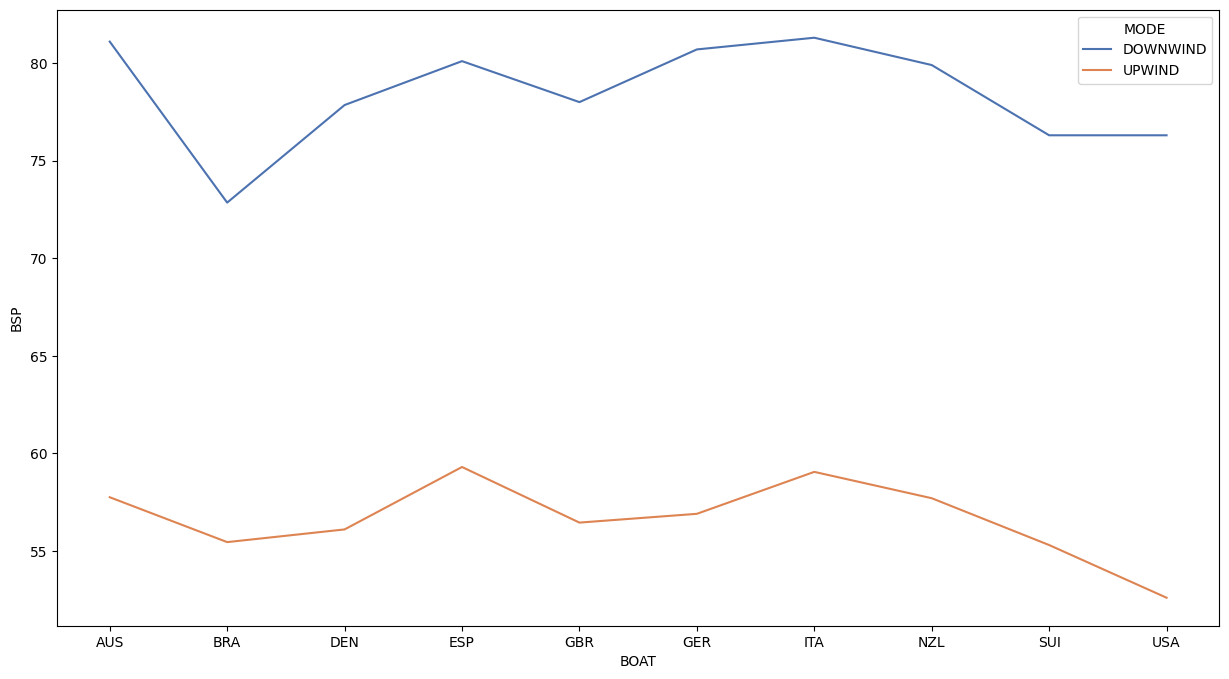

In [105]:
plt.figure(figsize=(15, 8))
# Plot the responses for different events and regions
sns.lineplot(x="BOAT", y="BSP",
             hue="MODE",
             palette="deep",errorbar=None,
             data=straightline_averages)


In [118]:
bin_width = 4
min_tws = 31
max_tws = int(df['TWS_MHU_SGP_km_h_1'].max())+1

# Create bins with range from min to max, every 2 kmh
df['tws_bins']=pd.cut(df['TWS_MHU_SGP_km_h_1'], bins=range(min_tws, max_tws + bin_width, bin_width))


In [119]:
len(offset_upwash_columns)

1034

In [120]:
# Get columns with OFFSET, UPWASH, and tws_bins
offset_upwash_columns = df.filter(regex='OFFSET|UPWASH|^tws_bins$', axis=1)


In [121]:
offset_upwash_columns['BOAT'] = df.loc[offset_upwash_columns.index, 'BOAT']
offset_upwash_columns['TWS_MHU_SGP_km_h_1'] = df.loc[offset_upwash_columns.index, 'TWS_MHU_SGP_km_h_1']


C:\Users\matsa\AppData\Local\Temp\ipykernel_21576\3362542192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offset_upwash_columns['BOAT'] = df.loc[offset_upwash_columns.index, 'BOAT']
C:\Users\matsa\AppData\Local\Temp\ipykernel_21576\3362542192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offset_upwash_columns['TWS_MHU_SGP_km_h_1'] = df.loc[offset_upwash_columns.index, 'TWS_MHU_SGP_km_h_1']


In [122]:
offset_upwash_columns['MODE'] = df.loc[offset_upwash_columns.index, 'MODE']


C:\Users\matsa\AppData\Local\Temp\ipykernel_21576\4030926596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offset_upwash_columns['MODE'] = df.loc[offset_upwash_columns.index, 'MODE']


In [123]:
offset_upwash_columns

,OFFSET_MWA_BOW_SGP_deg,dev_OFFSET_MWA_BOW_SGP_deg,OFFSET_MWA_MHU_SGP_deg,dev_OFFSET_MWA_MHU_SGP_deg,OFFSET_WIND_WGHT_BOW_SGP_pct,dev_OFFSET_WIND_WGHT_BOW_SGP_pct,OFFSET_WIND_WGHT_MHU_SGP_pct,dev_OFFSET_WIND_WGHT_MHU_SGP_pct,TWA_UPWASH_COR_BOW_SGP_deg,dev_TWA_UPWASH_COR_BOW_SGP_deg,...,OFFSET_RUDDER_SWAP_DW_deg_s_1,dev_OFFSET_RUDDER_SWAP_DW_deg_s_1,OFFSET_RUDDER_SWAP_UW_deg_s_1,dev_OFFSET_RUDDER_SWAP_UW_deg_s_1,ANGLE_WING_ROT_OFFSET_deg,dev_ANGLE_WING_ROT_OFFSET_deg,tws_bins,BOAT,TWS_MHU_SGP_km_h_1,MODE
1164,-0.7,0.0,-1.8,0.0,100.0,0.0,100.0,0.0,-8.00,0.00,...,0.0,0.0,0.5,0.0,-8.4,0.0,"(35, 39]",USA,36.47,UPWIND
129,0.5,0.0,-4.9,0.0,100.0,0.0,100.0,0.0,-8.19,0.31,...,2.0,0.0,2.0,0.0,0.2,0.0,"(39, 43]",AUS,41.58,NaN
1163,-0.7,0.0,-1.8,0.0,100.0,0.0,100.0,0.0,-8.00,0.00,...,0.0,0.0,0.5,0.0,-8.4,0.0,"(35, 39]",USA,37.73,UPWIND
616,2.2,0.0,-7.8,0.0,100.0,0.0,100.0,0.0,-9.08,0.54,...,0.0,0.0,0.5,0.0,-6.1,0.0,"(35, 39]",GBR,38.62,UPWIND
134,0.5,0.0,-4.9,0.0,100.0,0.0,100.0,0.0,-8.10,0.20,...,2.0,0.0,2.0,0.0,0.2,0.0,"(39, 43]",AUS,41.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,-7.7,0.0,2.1,0.0,100.0,0.0,100.0,0.0,6.46,0.22,...,0.1,0.0,0.4,0.0,-7.3,0.0,"(31, 35]",ESP,32.55,NaN
124,0.5,0.0,-4.9,0.0,100.0,0.0,100.0,0.0,4.95,0.11,...,2.0,0.0,2.0,0.0,0.2,0.0,"(31, 35]",AUS,33.72,NaN
123,0.5,0.0,-4.9,0.0,100.0,0.0,100.0,0.0,4.89,0.07,...,2.0,0.0,2.0,0.0,0.2,0.0,"(31, 35]",AUS,33.60,NaN
610,2.2,0.0,-7.8,0.0,100.0,0.0,100.0,0.0,0.00,0.00,...,0.0,0.0,0.5,0.0,-6.1,0.0,"(35, 39]",GBR,36.31,NaN


In [124]:
# Drop columns where all values are either 0 or 100
offset_upwash_columns = offset_upwash_columns.loc[:, ~((offset_upwash_columns == 0).all() | (offset_upwash_columns == 100).all())]
# Drop columns with names starting with 'dev_'
offset_upwash_columns.drop(columns=[col for col in offset_upwash_columns.columns if col.startswith('dev_')], inplace=True)



C:\Users\matsa\AppData\Local\Temp\ipykernel_21576\254915583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offset_upwash_columns.drop(columns=[col for col in offset_upwash_columns.columns if col.startswith('dev_')], inplace=True)


In [125]:
offset_upwash_columns

,OFFSET_MWA_BOW_SGP_deg,OFFSET_MWA_MHU_SGP_deg,TWA_UPWASH_COR_BOW_SGP_deg,TWA_UPWASH_COR_MHU_SGP_deg,TWS_UPWASH_COR_BOW_SGP_km_h_1,TWS_UPWASH_COR_MHU_SGP_km_h_1,OFFSET_DROP_ANGLE_DW_P_deg,OFFSET_DROP_ANGLE_DW_S_deg,OFFSET_DROP_ANGLE_UW_P_deg,OFFSET_DROP_ANGLE_UW_S_deg,OFFSET_RUDDER_SWAP_DW_deg_s_1,OFFSET_RUDDER_SWAP_UW_deg_s_1,ANGLE_WING_ROT_OFFSET_deg,tws_bins,BOAT,TWS_MHU_SGP_km_h_1,MODE
1164,-0.7,-1.8,-8.00,-1.00,4.93,-3.64,-0.5,-0.5,-0.5,-0.5,0.0,0.5,-8.4,"(35, 39]",USA,36.47,UPWIND
129,0.5,-4.9,-8.19,0.00,4.20,-2.38,-0.5,-0.5,-0.5,-0.5,2.0,2.0,0.2,"(39, 43]",AUS,41.58,NaN
1163,-0.7,-1.8,-8.00,-1.00,5.40,-3.78,-0.5,-0.5,-0.5,-0.5,0.0,0.5,-8.4,"(35, 39]",USA,37.73,UPWIND
616,2.2,-7.8,-9.08,0.00,7.38,-2.66,-0.5,-0.5,-0.5,-0.5,0.0,0.5,-6.1,"(35, 39]",GBR,38.62,UPWIND
134,0.5,-4.9,-8.10,0.00,4.24,-2.40,-0.5,-0.5,-0.5,-0.5,2.0,2.0,0.2,"(39, 43]",AUS,41.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,-7.7,2.1,6.46,12.95,0.85,-3.66,-0.5,-0.5,-0.5,-0.5,0.1,0.4,-7.3,"(31, 35]",ESP,32.55,NaN
124,0.5,-4.9,4.95,11.80,2.27,-2.90,-0.5,-0.5,-0.5,-0.5,2.0,2.0,0.2,"(31, 35]",AUS,33.72,NaN
123,0.5,-4.9,4.89,11.93,2.17,-2.88,-0.5,-0.5,-0.5,-0.5,2.0,2.0,0.2,"(31, 35]",AUS,33.60,NaN
610,2.2,-7.8,0.00,10.91,1.74,-2.50,-0.5,-0.5,-0.5,-0.5,0.0,0.5,-6.1,"(35, 39]",GBR,36.31,NaN


In [126]:
offset_upwash_columns.columns

Index(['OFFSET_MWA_BOW_SGP_deg', 'OFFSET_MWA_MHU_SGP_deg',
       'TWA_UPWASH_COR_BOW_SGP_deg', 'TWA_UPWASH_COR_MHU_SGP_deg',
       'TWS_UPWASH_COR_BOW_SGP_km_h_1', 'TWS_UPWASH_COR_MHU_SGP_km_h_1',
       'OFFSET_DROP_ANGLE_DW_P_deg', 'OFFSET_DROP_ANGLE_DW_S_deg',
       'OFFSET_DROP_ANGLE_UW_P_deg', 'OFFSET_DROP_ANGLE_UW_S_deg',
       'OFFSET_RUDDER_SWAP_DW_deg_s_1', 'OFFSET_RUDDER_SWAP_UW_deg_s_1',
       'ANGLE_WING_ROT_OFFSET_deg', 'tws_bins', 'BOAT', 'TWS_MHU_SGP_km_h_1',
       'MODE'],
      dtype='object')

In [130]:
offset_upwash_columns.groupby(['BOAT', 'MODE','tws_bins']).mean().to_excel("offset_upwash_columns.xlsx")


C:\Users\matsa\AppData\Local\Temp\ipykernel_21576\3160463792.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  offset_upwash_columns.groupby(['BOAT', 'MODE','tws_bins']).mean().to_excel("offset_upwash_columns.xlsx")
